In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level 
set_log_level('ERROR')

import warnings;
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
df.head()

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91


In [3]:
model = NeuralProphet(n_changepoints = 10,
                      yearly_seasonality = True,
                      weekly_seasonality = True,
                      daily_seasonality = True)

In [4]:
model.set_plotting_backend('plotly-static')

In [5]:
metrics = model.fit(df)

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

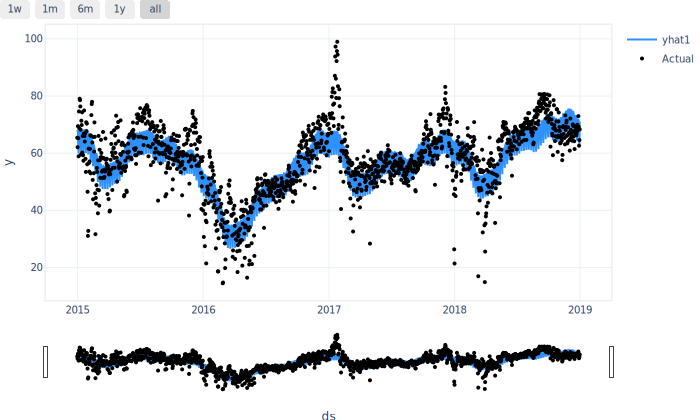

In [6]:
forecast = model.predict(df)
model.plot(forecast)

In [7]:
rsd_df = pd.DataFrame({'ds':df['ds'], 'residuals':df['y'] - forecast['yhat1']})
rsd_df.head()

,ds,residuals
0,2014-12-31,-2.707241
1,2015-01-01,-5.865788
2,2015-01-02,2.044530
3,2015-01-03,2.723372
4,2015-01-04,-0.999767


In [8]:
# fig1 = rsd_df.plot(x = 'ds',
                   # y = 'residuals',
                   # figsize = (10,6))

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

autoc = plot_acf(rsd_df["residuals"], lags = 50)

In [ ]:
model = NeuralProphet(n_changepoints = 10,
                      yearly_seasonality = True,
                      weekly_seasonality = True,
                      daily_seasonality = True,
                      n_lags=10)
model.set_plotting_backend("matplotlib")  
metrics = model.fit(df)
forecast = model.predict(df)
modelplot(forecast)

In [ ]:
model.plot_parameters(components = ["autoregression"])

In [ ]:
model.plot_components(forecast, components = ["autoregression"])